<a href="https://colab.research.google.com/github/LilibethDehorta/machine-learning/blob/main/proyecto_AP_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto #2 Aprendizaje no supervisado

---
###Conjunto de datos tomados de www.Kaggle.com


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
finan = pd.read_csv("Ecommerce.csv")

In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 87.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d12c261dded30dd757d00ccfa5b07899bf332624b1d124b467dcc6a44604bf98
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(finan)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Depuración y transformación de datos
Modificar las variables: Warehouse_block, Mode_of_Shipment, Product_importance, Gender

Eliminar la variable: ID y Reached.on.Time_Y.N de la data.

In [ ]:
genero = pd.get_dummies(finan['Gender'])
almac = pd.get_dummies(finan['Warehouse_block'])
envio = pd.get_dummies(finan['Mode_of_Shipment'])
prod = pd.get_dummies(finan['Product_importance'])

In [ ]:
envio=finan['Reached.on.Time_Y.N']
finan1 = pd.concat([finan.drop("Gender", axis = 1), genero,almac,envio,prod], axis = 1)
finan1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,...,M,A,B,C,D,F,Reached.on.Time_Y.N,high,low,medium
0,1,D,Flight,4,2,177,3,low,44,1233,...,0,0,0,0,1,0,1,0,1,0
1,2,F,Flight,4,5,216,2,low,59,3088,...,1,0,0,0,0,1,1,0,1,0
2,3,A,Flight,2,2,183,4,low,48,3374,...,1,1,0,0,0,0,1,0,1,0
3,4,B,Flight,3,3,176,4,medium,10,1177,...,1,0,1,0,0,0,1,0,0,1
4,5,C,Flight,2,2,184,3,medium,46,2484,...,0,0,0,1,0,0,1,0,0,1


### Datos sin escalar

In [ ]:
datosfin = finan1.drop(columns=['ID',  'Warehouse_block','Mode_of_Shipment','Product_importance','Reached.on.Time_Y.N'])
datosfin.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,F,M,A,B,C,D,F,high,low,medium
0,4,2,177,3,44,1233,1,0,0,0,0,1,0,0,1,0
1,4,5,216,2,59,3088,0,1,0,0,0,0,1,0,1,0
2,2,2,183,4,48,3374,0,1,1,0,0,0,0,0,1,0
3,3,3,176,4,10,1177,0,1,0,1,0,0,0,0,0,1
4,2,2,184,3,46,2484,1,0,0,0,1,0,0,0,0,1


### Diferentes Escalado delos datos
---
preprocessing.MaxAbsScaler,
preprocessing.MinMaxScaler,  preprocessing.RobustScaler,
 preprocessing.StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(datosfin)
minmaxf=scaler.transform(datosfin)
sc_minmax=pd.DataFrame(minmaxf)


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(datosfin)
maxabsf=scaler.transform(datosfin)
sc_maxabs=pd.DataFrame(maxabsf)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(datosfin)
robusf=scaler.transform(datosfin)
sc_robus=pd.DataFrame(robusf)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datosfin)
standf=scaler.transform(datosfin)
sc_stand=pd.DataFrame(standf)

## Modelos de aprendizaje no supervisado

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=06c9a9b8259e0f655babd7df9dd87912b61c41bbb7a15a9d24cb1c5ced6cbc23
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=2825529454f1ce45ffeb383c47d5c8d39aadebfc517bc490221826ad37990411
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


### Knn con 2 cluster

In [ ]:
from sklearn.decomposition import PCA
import umap
#import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2).fit_transform(datosfin)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


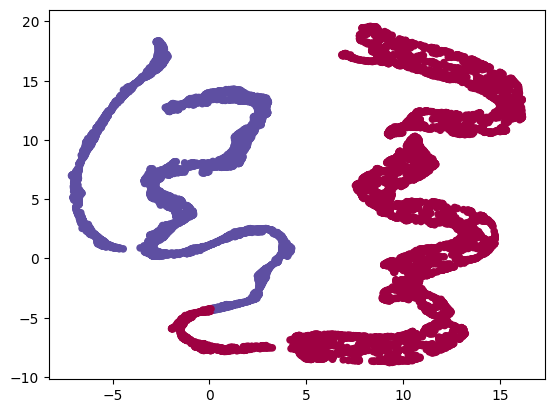

In [ ]:
import sklearn.cluster as cluster
kmeans_labels = cluster.KMeans(n_clusters=2).fit_predict(datosfin)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=20, cmap='Spectral');

In [ ]:
finan["target_knn"]=kmeans_labels

In [ ]:
finan["errr_knn"]=finan["Reached.on.Time_Y.N"]-finan["target_knn"]

In [ ]:
len(finan[finan["errr_knn"]==0])/len(finan)*100

61.33284844076734

### Sin escala UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for kulsinski distance metric; inverse_transform will be unavailable
  warn(
<ipython-input-22-98199766a939>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=20, cmap='Spectral')


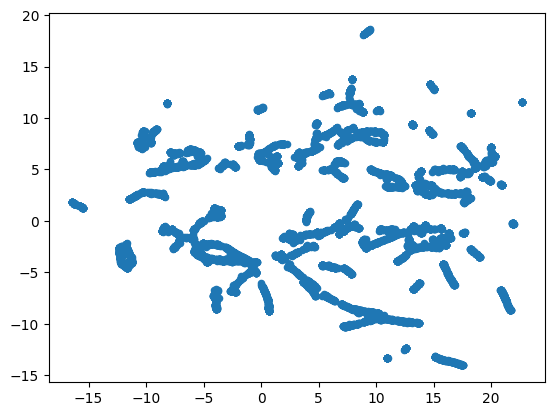

In [ ]:
standard_embedding = umap.UMAP(random_state=42, n_components=2, metric='kulsinski').fit_transform(datosfin)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=envio, s=20, cmap='Spectral')

In [ ]:
finan["UMAP1"],finan["UMAP2"]=standard_embedding[:,0],standard_embedding[:,1]

In [ ]:
finan["target_umap"]=np.where(finan["UMAP1"]<=2.6,1,0)

In [ ]:
finan["errr_umap"]=finan["Reached.on.Time_Y.N"]-finan["target_umap"]
len(finan[finan["errr_umap"]==0])/len(finan)*100


59.30539139921811

### Umap sin escala con transformacion

### Scaler UMAP

### Scaler UMAP con transformación

In [ ]:
from sklearn.preprocessing import QuantileTransformer, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="mean"), QuantileTransformer())
X = pipe.fit_transform(cancer.data.copy())

# Fit UMAP to processed data
manifold = umap.UMAP(random_state=42).fit(X)
X_reduced_2 = manifold.transform(X)